### Linear Models

Linear models are fast and simple algorithms.

They can do classification, regression, and probability estimation.

When presented with a new ML problem, trying a linear model is a good starting place.



### Linear Classification

As we've seen before, linear models have the following hypothesis space:

$\mathcal{H} = \{\text{sign}(\bar{w}^T\bar{x}) : \bar{w} \in \mathbb{R}^{d+1}\}$

This is where the data has $d$ features, and $\mathcal{X} = \{1\}\times\mathbb{R}^{d+1}$

The $\{1\}$ refers to the *bias column* in the data. 

If $\bar{x} = (x_0,x_1,\ldots,x_d)$, we always have $x_0 =1$.

### $E_{out}$ and $E_{in}$ 

In a linear setting you can prove that (with high probability)

$$E_{out}(g) = E_{in}(g) + O\left (\sqrt{\frac{d}{N} \ln N} \right ) $$

As usual with distribution free bounds, this is probably pessimistic.

In [1]:
import numpy as np

d = 5
N = 10*d

np.sqrt(d/N*np.log(N))

0.6254616699229575

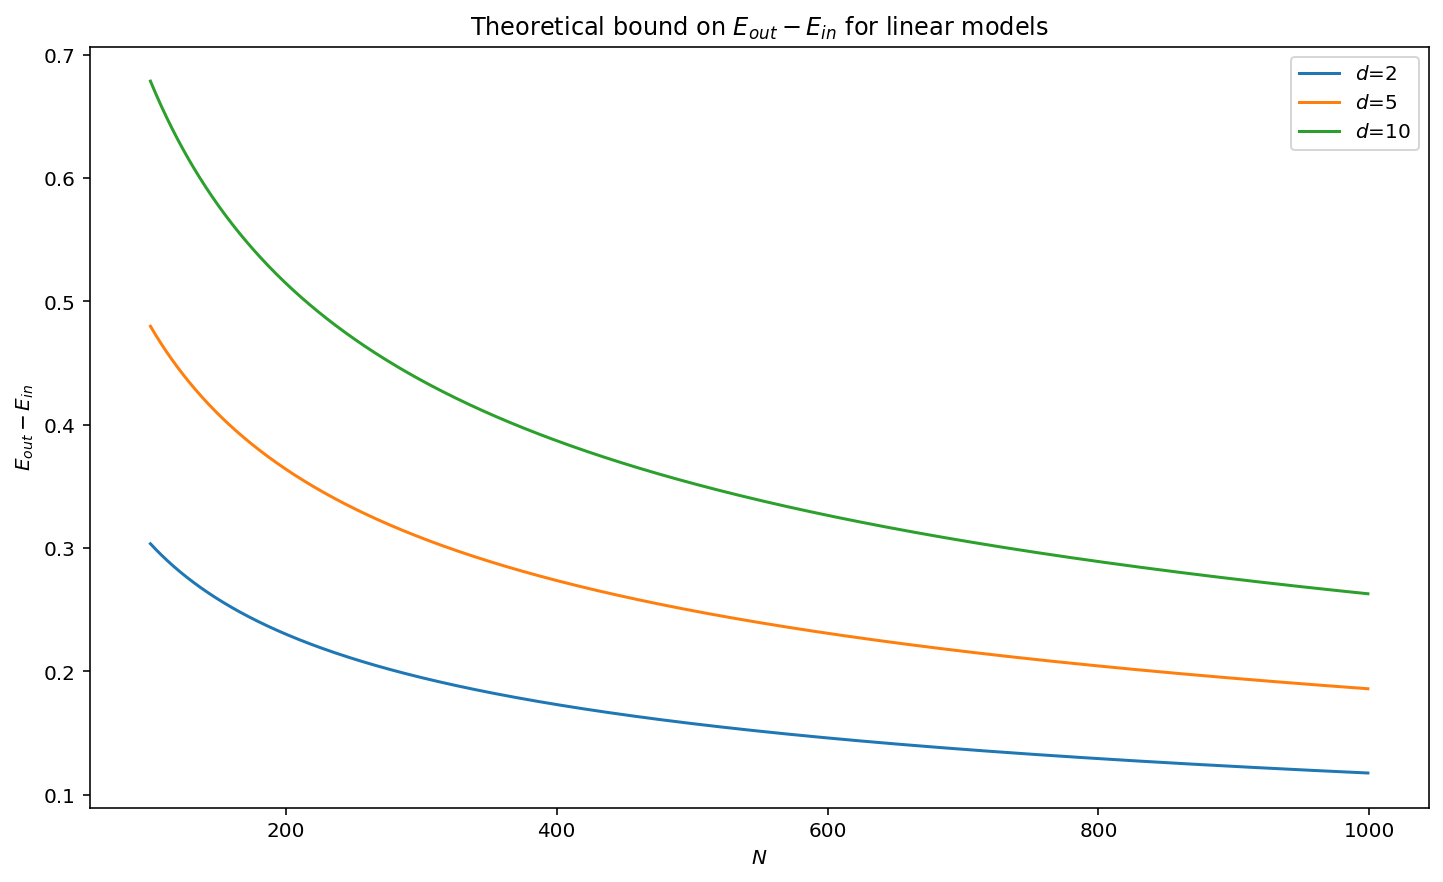

In [2]:
import matplotlib.pyplot as plt
N=np.arange(100,1000)
for d in [2,5,10]:
    plt.plot(N,np.sqrt(d/N*np.log(N)),label=r"$d$={}".format(d))
plt.legend()    
plt.title(r"Theoretical bound on $E_{out}-E_{in}$ for linear models")
plt.ylabel(r"$E_{out}-E_{in}$")
plt.xlabel(r"$N$")
plt.show()    

### A good $g$

The above proves that with linear models, even though $\mathcal{H}$ is infinite,

$$E_{in}(g) \approx E_{out}(g).$$

Now, can we make $E_{in}(g)$ small?

This depends on the data.

If the data is linearly separable, then $E_{in}(g) = 0$ (for the perceptron).

But the data might not be linearly separable.



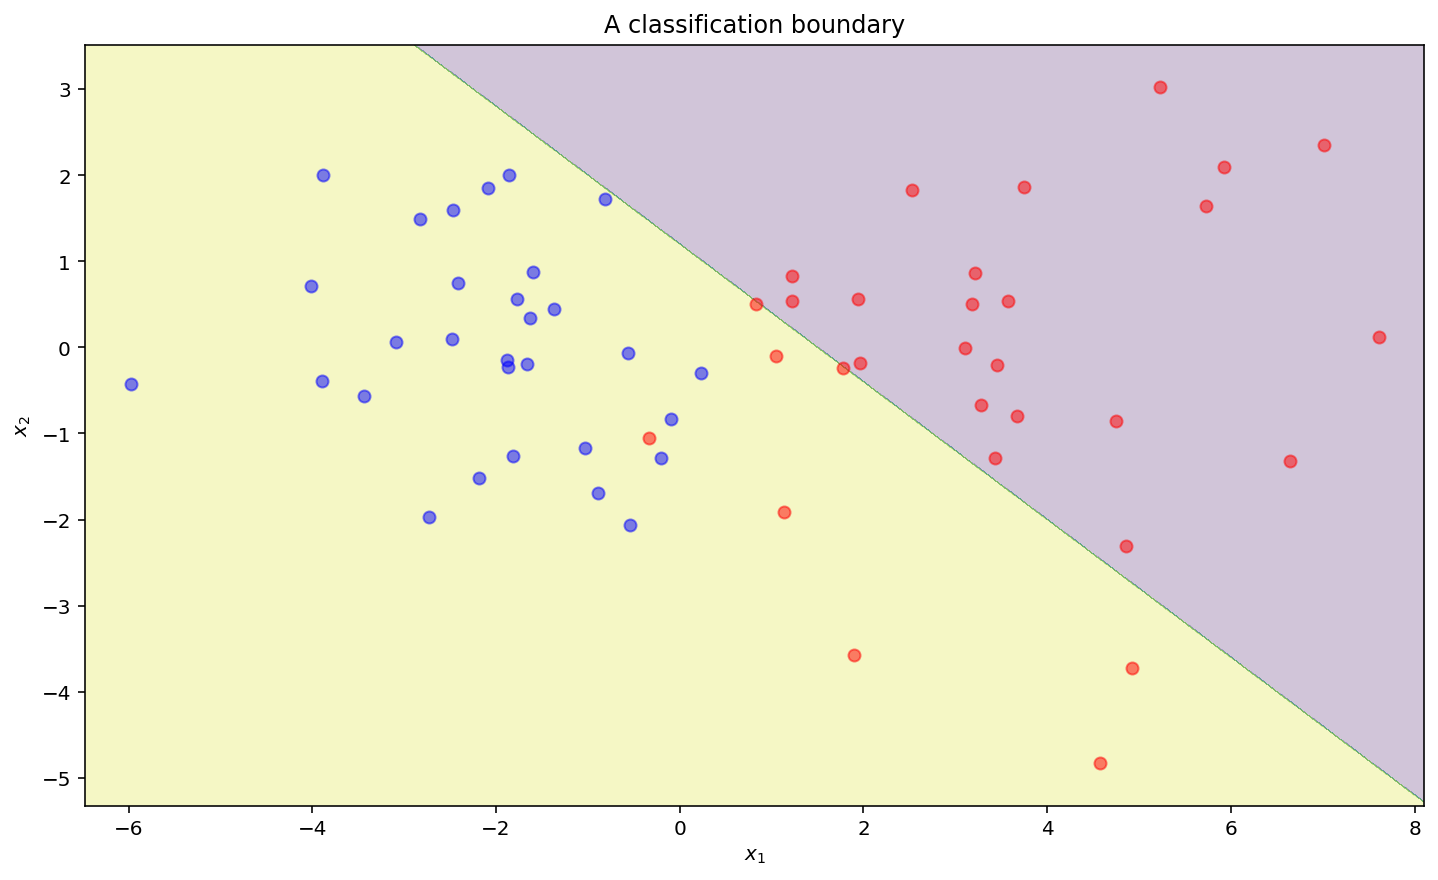

In [3]:
import mystuff as ms

X,y,w=ms.myblobs(sig_yes=1.2,sig_no=2)
ms.lin_boundary(w,X,y)

### Almost linearly separable

Often real world data is "almost" linearly separable.

This is not a formal concept, but the data tends to be almost separable by a hyperplane, except for a few noisy outliers.

A linear model might still work well on this data.

Sometimes though we might have data that is "inherently" nonlinearly separable.

(You can actually make linear models work in this case too, by transforming variables.)



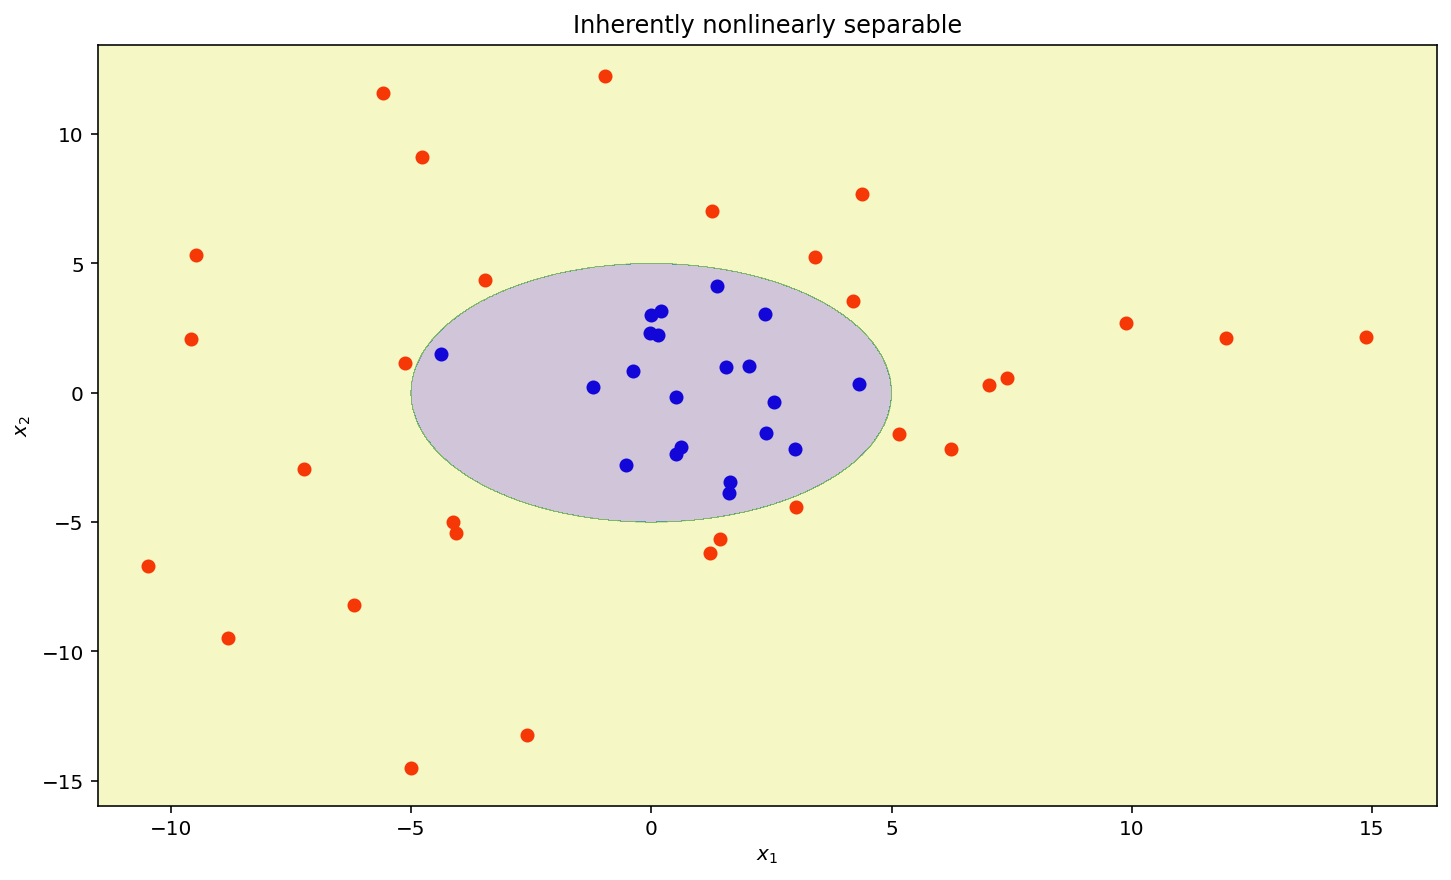

In [4]:
import matplotlib.pyplot as plt
import numpy as np



X,y = ms.make_nonlinear(sig=5)


### Finding an optimal linear boundary for nonlinearly separable data

If data is linearly separable then the perceptron finds a decision boundary with $E_{in}(g)=0$.

If the data is not linearly separable then the perceptron does not do well.

Suppose we want to find the absolute best hypothesis. 

We need to solve the combinatorial optimization problem

$$\min_{\bar{w}\in\mathbb{R}^{d+1}}\frac{1}{N} \sum_{n=1}^N [\![ \text{sign}(\bar{w}^T\bar{x}_n) \neq y_n]\!]$$

Because of the discrete nature of $[\![\cdot]\!]$ and `sign` we can't optimize this with calculus as we normally would.  

This problem is known to be NP-hard.


### Improving the perceptron

It turns out there is an easy tweak to the perceptron that works pretty well for linear classification.

The *Pocket Algorithm* is like the PLA except that it terminates after a specified number of iterations (*e.g.* 1000).

Rather than return the last $\bar{w}$ considered by the PLA, it returns the **best** w that was encountered during all of the iterations.  

To implement the pocket algorithm you simply alter the PLA so that it remembers the best weight vector found so far. 

The name comes from keeping the best hypothesis "in your pocket".

If we haven't already, let's look at HW2...

### Feature extraction

The book here goes off on a bit of a tangent with the MNIST handwritten digit dataset.

We follow them.

First we load the data, and visualize it.

Then we make the data 2D and visualize again.

We use the features of **intensity** and **symmetry** just as the book does.  


In [0]:
### Get MNIST dataset
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X.shape

In [0]:
### Visualize data

_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(X, y))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: {}'.format(label))
for ax, (image, label) in zip(axes[1, :], images_and_labels[4:8]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: {}'.format(label))    

In [0]:

def hflip(M):
    return M[:,np.array(list(reversed(range(M.shape[1]))))]

def sym(M):
    """The average intensity of the difference of X and its horizontal reflection"""
    P = hflip(M)
    return np.mean(np.abs(P-M)/np.mean(M))

def intensity(M):
    return np.mean(M)

X_tf = []
for x in X:
    M = x.reshape(28,28)
    X_tf.append([1,-sym(M),intensity(M)])
X_tf = np.array(X_tf)

In [0]:
image = X[1007].reshape(28,28)
plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
plt.imshow(hflip(image), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
plt.imshow(hflip(image)-image, cmap=plt.cm.gray_r, interpolation='nearest')
plt.colorbar()
plt.show()
plt.imshow(np.abs(hflip(image)-image), cmap=plt.cm.gray_r, interpolation='nearest')
plt.colorbar()
plt.show()

In [0]:
type1 = X_tf[y=='3']
type2 = X_tf[y=='1']



In [0]:
import matplotlib.pyplot as plt

plt.scatter(type1[:,1],type1[:,2],c='b',alpha=0.1)
plt.scatter(type2[:,1],type2[:,2],c='r',alpha=0.1)
plt.title("Unscaled scatterplot of symmetry vs intensity")
plt.show()

In [0]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
#scaler = MinMaxScaler()


scaler.fit(X_tf)
X_tf_n = scaler.transform(X_tf)

In [0]:
type1 = X_tf_n[y=='3']
type2 = X_tf_n[y=='1']

import matplotlib.pyplot as plt

plt.scatter(type1[:,1],type1[:,2],c='b',alpha=0.1)
plt.scatter(type2[:,1],type2[:,2],c='r',alpha=0.1)
plt.title("Scaled scatterplot of symmetry vs intensity")
plt.show()


In [0]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
three = y=='3'
one = y=='1'

threeOrOne = three+one

X_f = X_tf_n[threeOrOne]
y_f = y[threeOrOne]

X_train,X_test,y_train,y_test = train_test_split(X_f,y_f)
X_train.shape, X_f.shape,y_train.shape,y_f.shape

In [0]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
w=clf.coef_[0]
w

In [0]:
ybin = (y_test=='3')*2-1

ms.lin_boundary(w,X_test,ybin)


### Full dimensionality

Reducing dimensionality almost always destroys information.

We can see from the code below that learning is more effective when all the columns are retained.

But this doesn't mean that you shouldn't add derived columns or transform existing columns -- often this will improve performance.

Also it is sometimes necessary to decrease dimensionality for the purposes of visualization or to speed up the learning process.



In [0]:
threeOrOne = three+one

X_f = X[threeOrOne]
y_f = y[threeOrOne]

X_train,X_test,y_train,y_test = train_test_split(X_f,y_f)


clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
w=clf.coef_[0]


In [0]:

## Visualizing the learned weights...

plt.imshow(w.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("A picture of w")
plt.colorbar()
plt.show()

In [0]:
#clf = Perceptron(tol=1e-3, random_state=0)

#ms.plot_learning_curve(clf, "Learning curve for perceptron on MNIST", X, y,cv=4,n_jobs=4)

![lc](learning_curve.png)

![ilc](ideal_lc.png)

### Learning curve analysis

Checking the learning curve on this data it looks like we have high bias.

This means that our data is sufficient to allow a more complex hypothesis space.

We could make our $\mathcal{H}$ more complex by introducing some extra derived variables (such as intensity).

It also seems like the default `max_iter` for the sklearn Perceptron is too high for this data.

$E_{out}$ is minimized when we fit the perceptron for about 9 time units.

After that overfitting may be occurring. 

We could fix that by decreasing `max_iter`.

(But this would decrease the complexity of $\mathcal{H}$... The indications here are a little contradictory.)

Another possibility is that we just need to shuffle the data.


In [0]:
clf = Perceptron(tol=1e-3, random_state=0)
shuffle = np.random.permutation(X.shape[0])
plt=ms.plot_learning_curve(clf, "Learning curve for perceptron on MNIST", X[shuffle], y[shuffle],cv=4,n_jobs=4)
plt.show()

![slc](shuffled_lc.png)

### Yep, that was it :)

##  Regression 

We now switch from classification to the problem of regression.

In classification we tried to learn a (possibly noisy) function

$$f:\mathcal{X} \rightarrow \mathcal{Y}$$

where $\mathcal{Y}$ was a discrete set of categories (cat or not).

Now, in regression, we want to learn a (probably noisy) function

$$f:\mathcal{X} \rightarrow \mathcal{Y}$$

where $\mathcal{Y}$ was a continuous range of values (height, price, *etc*).

### Linear regression

Linear regression is a very powerful and elegant regression algorithm.

In it's basic form it tries to fit the data with a hyperplane.

This assumes a certain flatness to the data.

However we will see that by transformations of variables, LR can fit the data with many types of surface (curve in 2d).

### The hat matrix

We have already seen how to perform linear regression.

In fact you have implemented it yourself.

Linear regression is performed simply by computing the hat matrix

$$H = X^T(XX^T)^{-1}X$$

and then applying $H$ to the dependent variable $y$

$$\hat{y} = Hy$$

Now $\hat{y}$ are the predictions made by linear regression for each of the rows of $X$ by our hypothesis $h \approx f$.

$$\hat{y}_i = h(\bar{x}_i)$$
$$ y_i = f(\bar{x}_i)$$
$$ \hat{y}_i \approx y_i$$

We will give the proof of this after a quick example.


Below we give a made up example in which we try to use linear regression to learn data produced by a noisy square root.

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def noisycurve(f,dom,noise):
    y =f(dom)+noise
    plt.scatter(dom,y,alpha=0.5)
    return y

N = 30
noise = np.random.randn(N)*0.1
dom = np.random.choice(np.arange(0,10,.1),N)
y=noisycurve(np.sqrt,dom,noise)
plt.show()

In [0]:
import mystuff as ms


X = np.ones((N,2))
X[:,1] = dom
w = np.array([0,3])
H = ms.getH(X)
yhat = H.dot(y)
noisycurve(np.sqrt,dom,noise)
plt.plot(dom,yhat,color='red',label="regression line")
plt.legend()
plt.show()

### Evaluating error

How good a fit is the line we found?  

A common measure of error is the mean squared error (MSE):

$$MSE(y,\hat{y}) = \frac{1}{N}\sum (y_i - \hat{y}_i)^2$$

To "fix the units" often the root is taken to form root mean squared error (RMSE):

$$RMSE(y,\hat{y}) = \sqrt{\frac{1}{N}\sum (y_i - \hat{y}_i)^2}$$

The problem with both of these measures is that they are dependent on the range of $y$.

If $y$ contains large values then RMSE will be large.

If $y$ contains small values then RMSE will be small. 

It's hard to compare performance on different datasets (consider scaling).


In [0]:
ms.RMSE(y,yhat)

#### Coefficient of determination $R^2$

A less data dependent notion of error is the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) $R^2$.

In "simple" univariate linear regression this is just $r^2$ where $r$ is the Pearson correlation coefficient.

In multivariate linear regression $R$ is the [coefficient of multiple correlation](https://en.wikipedia.org/wiki/Multiple_correlation).

Intuitively $R^2$ is the proportion of variance in the target variable that is explained by the hypothesis.

The simplest formula is 

$$R^2 = 1-\frac{SS_{res}}{SS_{tot}}$$

Where 

$$SS_{tot} = \sum (y_i-\bar{y})^2$$

and 

$$SS_{res} = \sum (y_i-\hat{y}_i)^2.$$

Note that, for all datasets,

$$0 \leq R^2 \leq 1$$

An $R^2$ near 1 is good, and an $R^2$ near 0 is bad.

The definition of $R^2$ is unrelated to scale, so you can see if scaling improves this score in a meaningful way.



In [0]:

ms.R2(y,yhat)

## Regression on a real dataset

We now perform regression on a commonly used dataset called the Boston Housing Dataset (described below).

The goal is to predict median housing value in suburbs of Boston based on their attributes.

Here are a few of the features considered:

```
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. (etc)
    ...
    14. MEDV     Median value of owner-occupied homes in $1000's
```    

### Loading the data

Loading the data is not always trivial when you don't have a lot of experience.

We quickly run through a few considerations and then load the dataset with pandas.


In [0]:
### Look at the first 3 lines of the data.  Is it space or tab delimited?
### Notice that there is no header line.
!head -3 housing.data

In [0]:
### Passing to xxd shows that it's probably space delimited
!head -1 housing.data | xxd
## space = 0x20

In [0]:
import pandas as pd
df=pd.read_csv("housing.data",header=None,delim_whitespace=True)
df.head()

### Adding a bias column

Like other linear techniques, linear regression requires a bias column.

We quickly add one to the data.


In [0]:

df = ms.add_bias(df)    
df.head()

### Convert to numpy

Working data scientists might work entirely with pandas and sklearn but we want to understand the underlying algorithms.

For that reason we convert to numpy so that we can implement LR ourselves.


In [0]:
data = df.values

### Let's go!

Now we do a test/train split, do linear regression, and then check the R2 score.


In [0]:
X = data[:,:-1]
y = data[:,-1]
np.random.seed(22)
X_train,X_test,y_train,y_test = train_test_split(X,y)
w = np.linalg.pinv(X_train).dot(y_train)
y_test_hat = X_test.dot(w)
ms.R2(y_test_hat,y_test)

### Does scaling help?

We try scaling the data to see if that will improve performance.

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
np.random.seed(22)
X_train,X_test,y_train,y_test = train_test_split(X,y)
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test =scaler.transform(X_test)

### The stupid scaler broke the bias column...
X_train[:,0] = np.ones(X_train.shape[0])
X_test[:,0] = np.ones(X_test.shape[0])

w = np.linalg.pinv(X_train).dot(y_train)
y_test_hat = X_test.dot(w)
ms.R2(y_test_hat,y_test)

### No! 

Scaling doesn't seem to help. 

This R2 score is not great.  Is it us, or is it the data?

In a real application we would never know.

But for this toy data it's easy to compare our results with others:

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

Our score is pretty typical for linear regression on this dataset.
